<a href="https://colab.research.google.com/github/Shreyas5848/Household-energy-consumption/blob/main/k-mean-clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('/content/KwhConsumptionBlower78_1 (1).csv')
data

,Unnamed: 0,TxnDate,TxnTime,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916
...,...,...,...,...
1223,97922,20 Jan 2022,21:43:55,5.128
1224,97951,20 Jan 2022,09:43:03,5.924
1225,97980,20 Jan 2022,03:06:05,4.664
1226,98009,20 Jan 2022,06:16:38,3.474


In [29]:
data['DateTime'] = pd.to_datetime(data['TxnDate']+' '+data['TxnTime'])


In [30]:
data = data.drop(['TxnDate','TxnTime'],axis=1)
data = data.drop(['Unnamed: 0'], axis=1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Consumption  1228 non-null   float64       
 1   DateTime     1228 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.3 KB


In [32]:
data.isnull().sum()

,0
Consumption,0
DateTime,0


In [33]:
data.describe()

,Consumption,DateTime
count,1228.000000,1228
mean,3.428194,2022-01-10 23:42:46.149022720
min,0.842000,2022-01-01 00:22:28
25%,0.952000,2022-01-06 03:18:53.750000128
50%,1.121000,2022-01-10 22:29:25
75%,5.754500,2022-01-15 19:39:20.249999872
max,27.108000,2022-01-20 23:47:55
std,3.535620,NaN


In [43]:
data['Date'] = data['DateTime'].dt.date
daily_data = data.groupby('Date')['Consumption'].agg(['sum', 'mean', 'max', 'std']).reset_index()



In [46]:
daily_data.head()

,Date,TotalConsumption,AvgConsumption,PeakConsumption,ConsumptionStdDev
0,2022-01-01,65.462,1.039079,1.980,0.289657
1,2022-01-02,268.450,4.793750,27.108,5.026718
2,2022-01-03,236.566,4.928458,12.604,3.009496
3,2022-01-04,222.020,3.469063,15.970,2.938483
4,2022-01-05,380.630,5.767121,19.178,4.198120


In [45]:
daily_data.columns = ['Date', 'TotalConsumption', 'AvgConsumption', 'PeakConsumption', 'ConsumptionStdDev']

In [48]:
daily_data.head(10)

,Date,TotalConsumption,AvgConsumption,PeakConsumption,ConsumptionStdDev
0,2022-01-01,65.462,1.039079,1.980,0.289657
1,2022-01-02,268.450,4.793750,27.108,5.026718
2,2022-01-03,236.566,4.928458,12.604,3.009496
3,2022-01-04,222.020,3.469063,15.970,2.938483
4,2022-01-05,380.630,5.767121,19.178,4.198120
5,2022-01-06,400.964,6.265062,20.820,4.219798
6,2022-01-07,388.762,6.074406,25.282,4.225571
7,2022-01-08,65.244,1.052323,2.022,0.294684
8,2022-01-09,146.850,2.330952,18.390,3.378766
9,2022-01-10,218.740,3.216765,15.306,3.438943


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
features = daily_data[['TotalConsumption', 'AvgConsumption', 'PeakConsumption', 'ConsumptionStdDev']]

In [51]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

In [54]:
daily_data['Cluster'] = clusters

In [55]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features)

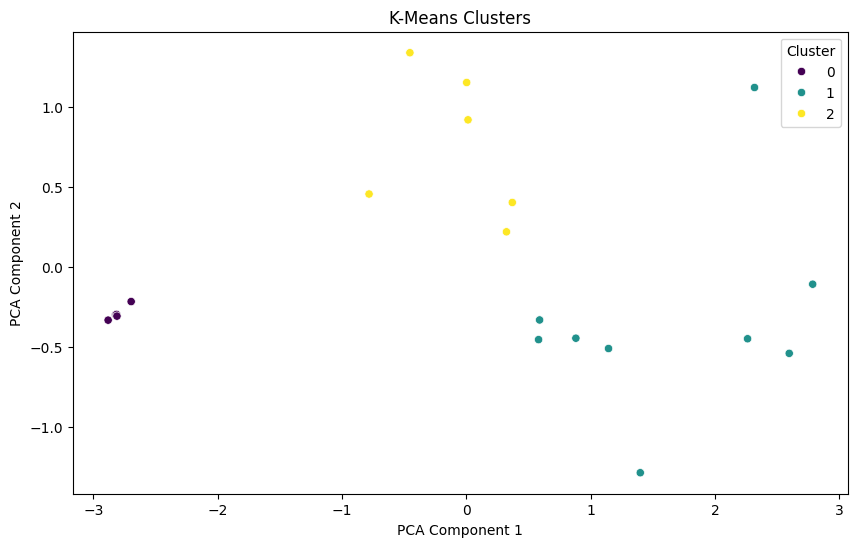

In [61]:
plt.figure(figsize=(10, 6))
#plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis')
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=daily_data['Cluster'], palette='viridis')
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [62]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(normalized_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5495745416264106


In [65]:
cluster_summary = daily_data.drop(columns=['Date']).groupby('Cluster').mean()
print(cluster_summary)


         TotalConsumption  AvgConsumption  PeakConsumption  ConsumptionStdDev
Cluster                                                                      
0               65.726800        1.052717         2.165200           0.288183
1              321.672222        5.319482        18.164000           3.601438
2              164.356333        2.618119        15.938667           3.135320
